<a href="https://colab.research.google.com/github/cbertolasio/geospatial-datascience-quickstart/blob/main/Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Location Intelligence

## Installations

The geospatial libraries are not pre installed in google colab as standard python library, therefore we need to install some libraries to use. Luckily this is an easy process. You can use either apt install or pip install. You can also create anaconda environment, but that is a bit complex so pip and apt are enough in our case to get the libraries we need. These are the libraries we need to install in this tutorial:

Gdal
Geopandas
Folium

The installation might take 1 minute.


In [1]:
%%time 
!apt update
!apt upgrade
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium 

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu 

In [3]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 45.3 MB/s 
     |████████████████████████████████| 6.3 MB 53.7 MB/s 


In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import os
import seaborn as sns

## Data 

The dataset for this chapter is stored in the dropbox link. It is a valuable skill to learn how to access data on the web, so we will use WGET. WGET is great utility in accessing files from the web and supports different protocols. 

In [5]:
# Get the data from dropbox link
!wget https://www.dropbox.com/s/0zytrf2ncoquxgq/Foursquare_2014_NYC.zip

--2022-06-23 21:50:12--  https://www.dropbox.com/s/0zytrf2ncoquxgq/Foursquare_2014_NYC.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0zytrf2ncoquxgq/Foursquare_2014_NYC.zip [following]
--2022-06-23 21:50:12--  https://www.dropbox.com/s/raw/0zytrf2ncoquxgq/Foursquare_2014_NYC.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc44b8d4f9381c48906e0fa80a38.dl.dropboxusercontent.com/cd/0/inline/BnxN59EflDu7Zz1UvJ4b_NIZB1YVjddmFTcABlWJDI0_OsNfXa708Jm5X4EGGYBlFOeN61Aw2sXeNsHb453RRmGkevN8i9hSnDgPjeCO1NRrlsXzDrnTt2wMNWos-0TbBD3cgPg5FZTDLamwLAJUs7Zj85a-sT2SMaxvEllCEcTEjQ/file# [following]
--2022-06-23 21:50:13--  https://uc44b8d4f9381c48906e0fa80a38.dl.dropboxusercontent.com/cd/0/inline/BnxN59EflDu7Zz1UvJ4b_NIZB1YVjddmFTc

In [6]:
os.listdir(os.getcwd())

['.config', 'Foursquare_2014_NYC.zip', 'sample_data']

In [7]:
# We have zipped data so let us unzip it
!unzip Foursquare_2014_NYC.zip

Archive:  Foursquare_2014_NYC.zip
  inflating: dataset_TSMC2014_NYC.txt  


In [8]:
# Reading the nyc foursquare data

# create column names as this comes without headers
col_names = ['UserID', 'VenueID', 'VenueCategoryID', 'VenueCategoryName', 'Latitude', 'Longtitude','Timezone', 'UTCtime']

# read the csv with pandas. the data comes in tab seperator. 
nyc = pd.read_csv('dataset_TSMC2014_NYC.txt',names=col_names,sep="\t",  encoding = "ISO-8859-1" )

# Look at the first 5 rows
nyc.head()

,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


In [9]:
# shape of the data (rows, columns)
nyc.shape

(227428, 8)

## Convert to Geographic Data

In [10]:
# Save the geometry as a new feature
geometry = [Point(xy) for xy in zip(nyc['Longtitude'], nyc['Latitude'])]

# Create crs dictionary
crs = {'init': 'epsg:4326'}

In [11]:
nyc_gdf = gpd.GeoDataFrame(nyc, crs=crs, geometry=geometry)
nyc_gdf.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,POINT (-74.00258 40.71981)
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,POINT (-74.04417 40.60680)
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,POINT (-73.88307 40.71616)
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,POINT (-73.98252 40.74516)
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,POINT (-73.98966 40.74010)


## USER Perspective 

In [12]:
user395 = nyc_gdf[nyc_gdf['UserID'] == 395]
user395.head()

,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,POINT (-73.98252 40.74516)
7820,395,4b607313f964a5209be629e3,4bf58dd8d48988d176941735,Gym / Fitness Center,40.748005,-74.008627,-240,Tue Apr 10 02:14:21 +0000 2012,POINT (-74.00863 40.74800)
15980,395,4a72e5fef964a52050db1fe3,4bf58dd8d48988d176941735,Gym / Fitness Center,40.746326,-74.008624,-240,Sat Apr 14 17:59:13 +0000 2012,POINT (-74.00862 40.74633)
17162,395,4c7447221b30a093c93fec09,4bf58dd8d48988d16d941735,Café,40.643021,-73.977502,-240,Sun Apr 15 02:09:25 +0000 2012,POINT (-73.97750 40.64302)
17866,395,4d716e7f1c01b60c219214c7,4bf58dd8d48988d10c951735,Cosmetics Shop,40.762617,-73.993360,-240,Sun Apr 15 16:12:55 +0000 2012,POINT (-73.99336 40.76262)


In [13]:
user395['VenueCategoryID'].nunique()

36

In [14]:
m = folium.Map (
    location = [40.71981037548853, -74.00258103213994],
    tiles='Stamen Toner',
    zoom_start = 15
)
folium.GeoJson(user395).add_to(m)
m

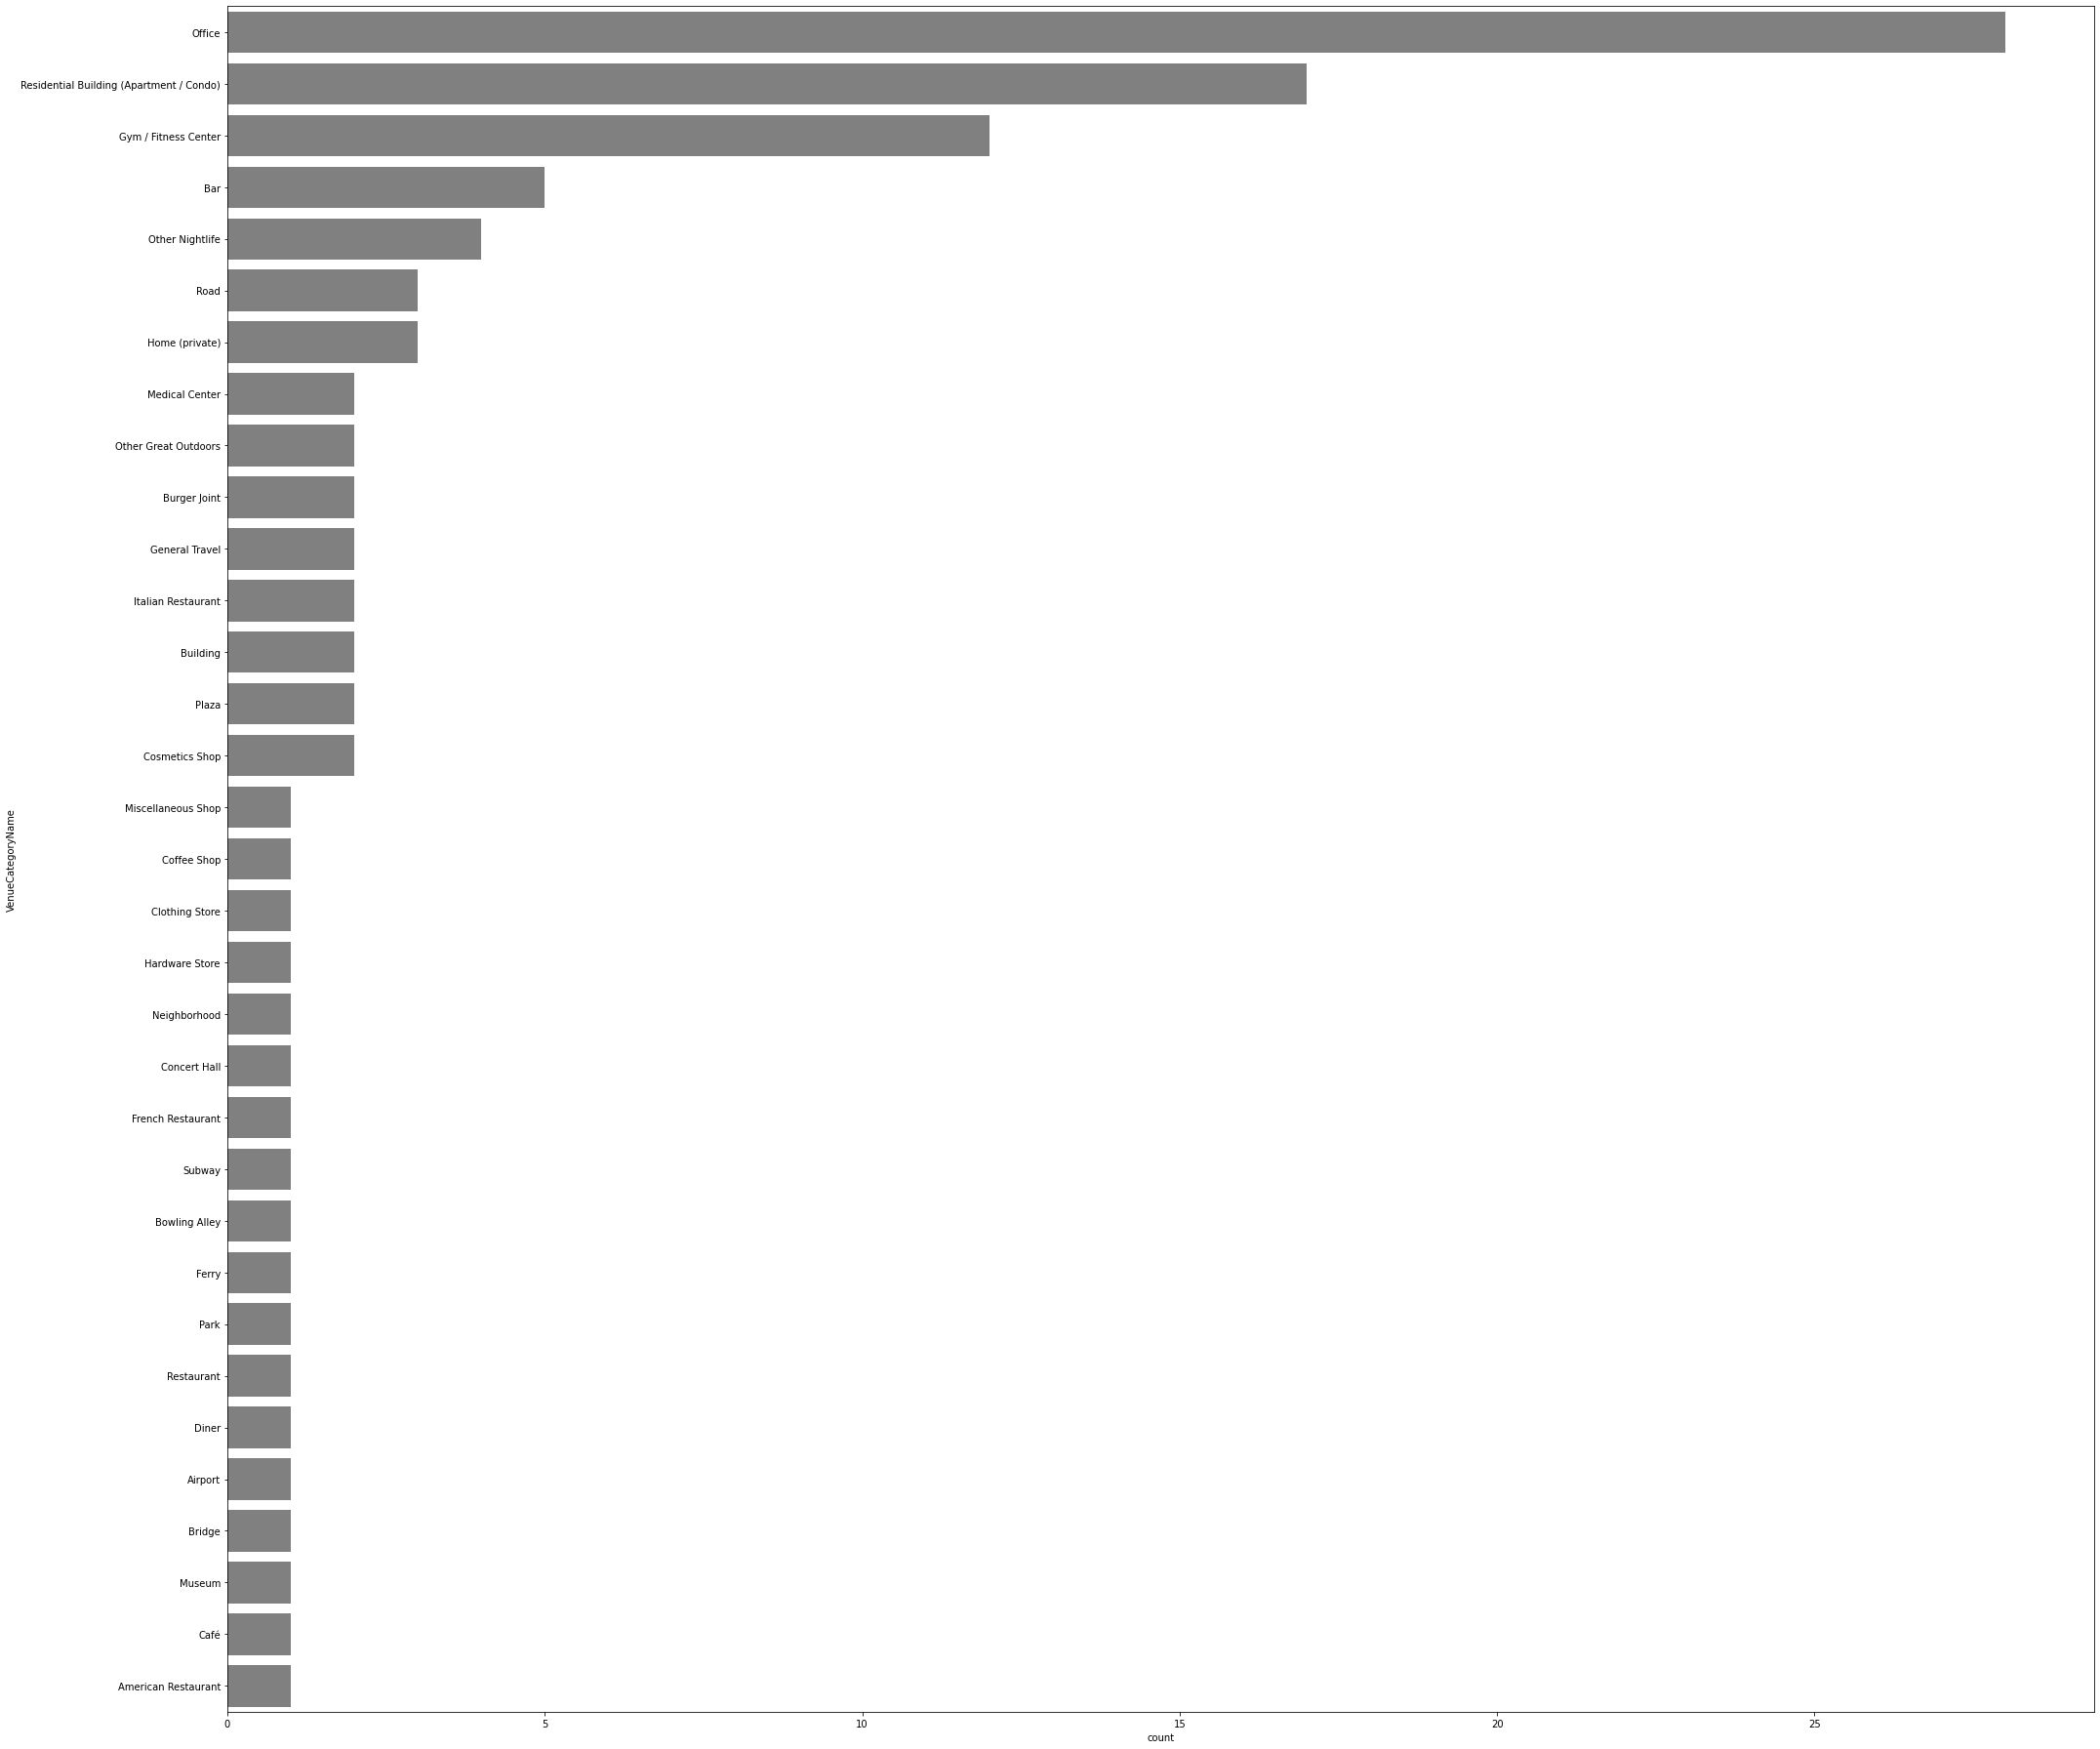

In [15]:
fig, ax = plt.subplots(figsize=(30,25))
plot = sns.countplot(y = 'VenueCategoryName', 
                     color='grey',
              order = user395['VenueCategoryName'].value_counts().index,
              data=user395, ax=ax)

plot.figure.savefig('user395.png')

plot
plt.tight_layout()
plt.show()

## Business Perspective

In [16]:
venueID = '4aca718ff964a520f6c120e3' 
gym = nyc_gdf[nyc['VenueID'] == venueID]
gym.head()

,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry
6578,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766958,-73.957775,-240,Mon Apr 09 14:51:20 +0000 2012,POINT (-73.95777 40.76696)
9661,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766958,-73.957775,-240,Wed Apr 11 13:39:29 +0000 2012,POINT (-73.95777 40.76696)
13575,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766958,-73.957775,-240,Fri Apr 13 13:48:19 +0000 2012,POINT (-73.95777 40.76696)
16111,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766920,-73.957517,-240,Sat Apr 14 18:47:47 +0000 2012,POINT (-73.95752 40.76692)
19320,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766920,-73.957517,-240,Mon Apr 16 15:30:40 +0000 2012,POINT (-73.95752 40.76692)


In [ ]:
gym.shape

(118, 9)

In [17]:
# Create a datatime column from UTCtime
gym['UTCtime'] = pd.to_datetime(gym['UTCtime'])

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [18]:
gym['hours'] = gym['UTCtime'].dt.hour

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [19]:
gym.head()

,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry,hours
6578,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766958,-73.957775,-240,2012-04-09 14:51:20+00:00,POINT (-73.95777 40.76696),14
9661,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766958,-73.957775,-240,2012-04-11 13:39:29+00:00,POINT (-73.95777 40.76696),13
13575,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766958,-73.957775,-240,2012-04-13 13:48:19+00:00,POINT (-73.95777 40.76696),13
16111,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766920,-73.957517,-240,2012-04-14 18:47:47+00:00,POINT (-73.95752 40.76692),18
19320,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766920,-73.957517,-240,2012-04-16 15:30:40+00:00,POINT (-73.95752 40.76692),15


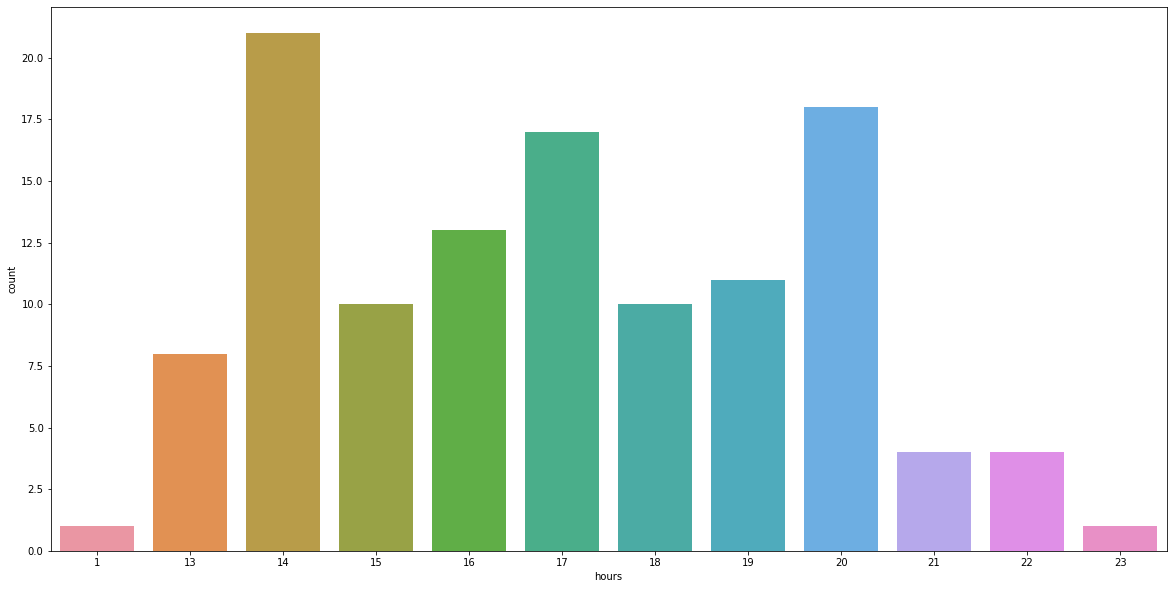

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
plot = sns.countplot(x = 'hours', 
              #order = gym['hours'].value_counts().index,
              data=gym, ax=ax)
plot.figure.savefig('gym_time.png')

plot;

# END